In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, HuberRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from scipy.stats import uniform

In [6]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

features = ['County', 'State', 'ZHVI_prev', 'ZHVI', 'Year', 'Month', 'UnemploymentRate', '#hospital',
       'hospital_rating', 'private_schools_count', 'public_schools_count',
       'CPI', 'Interest Rate', 'inc', 'inc_ineql', 'BD', 'highschool', 'migr', 'residt']
catFeatures = ['County', 'State']
numFeatures = list(set(features) - set(catFeatures))
#dropFeatures = list(set(train_data.columns) - set(features) - set(['ZHVI_next']))

In [7]:
train_data.shape

(75071, 641)

In [8]:
trainX = train_data.drop('ZHVI_next', axis=1)
trainY = train_data['ZHVI_next']

testX = test_data.drop('ZHVI_next', axis=1)
testY = test_data['ZHVI_next']

In [9]:
def MAE(y, pred):
    return np.mean( np.abs(y - pred) )

def trend_accuracy(test_df, pred):
    trend = np.sign(test_df.ZHVI_next - test_df.ZHVI)
    trend_pred = np.sign(pred - test_df.ZHVI)

    return np.mean(trend == trend_pred)

def trend_accuracy2(test_df, pred):
    trend = np.sign(test_df.ZHVI_next - test_df.ZHVI)
    trend_pred = np.sign(pred - test_df.ZHVI)

    return np.mean(trend == trend_pred)

trainX = trainX.drop(['ZHVI', 'ZHVI_prev', 'Year', 'Month'], axis=1)
testX = testX.drop(['ZHVI', 'ZHVI_prev', 'Year', 'Month'], axis=1)

In [10]:
reg_boost = GradientBoostingRegressor().fit(trainX, trainY)
pred_boost = reg_boost.predict(testX)
MAE(testY, pred_boost), trend_accuracy(test_data, pred_boost)

(1729.8477253628378, 0.6336849957374254)

In [19]:
importantFeatures = ['ZHVI', 'ZHVI_prev', 'CPI', 'BD', 'UnemploymentRate', 'migr', 'inc_ineql', 'highschool', 'private_schools_count', 'public_schools_count']

reg_rf = RandomForestRegressor().fit(trainX[importantFeatures[:3]], trainY)
pred_rf = reg_rf.predict(testX[importantFeatures[:3]])
MAE(testY, pred_rf), trend_accuracy(test_data, pred_rf)

(1154.3519933898317, 0.8427642796248934)

In [84]:
pred_rf_train = reg_rf.predict(trainX[importantFeatures[:3]])
MAE(pred_rf_train, trainY)

626.0922405830456

In [16]:
zipped = zip(reg_rf.feature_importances_, trainX.columns)
feature_ranked = [x for _,x in sorted(zipped, reverse=True)]
importance_ranked = sorted(reg_rf.feature_importances_, reverse=True)

#important_featuresID = [i for i, e in enumerate(trainX.columns) if e in set(feature_ranked)]

for i in range(20):
    print(feature_ranked[i], importance_ranked[i])

ZHVI 0.9697412851691765
ZHVI_prev 0.01802985809080746
CPI 0.009280741055474082
UnemploymentRate 0.0002801095491011944
BD 0.00024184014040811775
migr 0.0002404864692764865
inc_ineql 0.0001700260763233195
highschool 0.0001616135108115242
State_NJ 0.00014233152738026263
private_schools_count 0.00013291399543895275
hospital_rating 0.0001094164254449069
public_schools_count 0.00010818675782756354
residt 9.296878992356678e-05
County_Steuben 9.163780943264177e-05
inc 8.039820302135934e-05
#hospital 7.044690146451414e-05
Month 6.383874562588343e-05
County_Allegany 4.293121059418682e-05
County_Wayne 4.127260816508318e-05
County_Weber 3.635816950891061e-05


Text(0.5, 1.0, 'Random forest model')

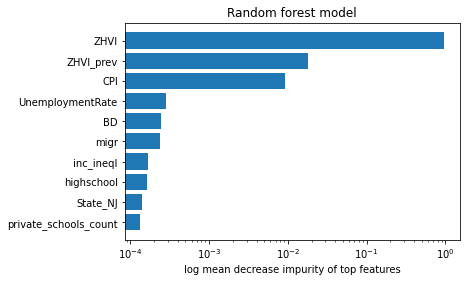

In [18]:
plt.barh(feature_ranked[:10], importance_ranked[:10])
plt.xscale('log')
plt.gca().invert_yaxis()
plt.xlabel('log mean decrease impurity of top features')
plt.title('Random forest model')

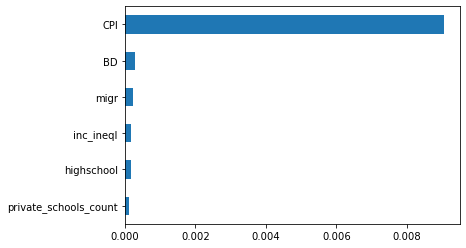

In [43]:
(pd.Series(reg_rf.feature_importances_[5:], index=trainX.columns[5:])
   .nlargest(6)
   .plot(kind='barh').invert_yaxis())

In [62]:
zipped = zip(reg_boost.feature_importances_, trainX.columns)
feature_ranked = [x for _,x in sorted(zipped, reverse=True)]
importance_ranked = sorted(reg_boost.feature_importances_, reverse=True)

#important_featuresID = [i for i, e in enumerate(trainX.columns) if e in set(feature_ranked)]

for i in range(20):
    print(feature_ranked[i], importance_ranked[i])

BD 0.5514973710205116
State_CA 0.08859154896545783
inc 0.0599698916020484
public_schools_count 0.03540452928176979
residt 0.030089045119898444
State_HI 0.027284565709209636
hospital_rating 0.025945579962844346
inc_ineql 0.016469377759227258
UnemploymentRate 0.01594748292594175
migr 0.012498370721051108
State_MA 0.012400726680819355
State_OR 0.012071315464676696
State_WA 0.01062392769116969
State_CO 0.010451959669272393
State_NJ 0.010339060236328473
CPI 0.008420947591436188
private_schools_count 0.0071875815551986745
State_OK 0.005753210480843342
highschool 0.004528058600733676
County_Marin 0.004424532338293687


<BarContainer object of 10 artists>

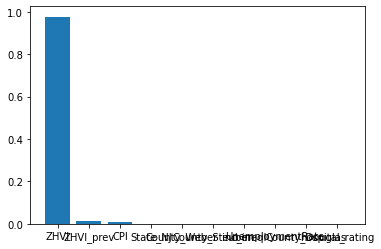

In [40]:
plt.bar(feature_ranked[:10], importance_ranked[:10])

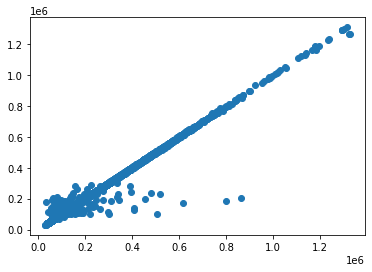

In [14]:
plt.scatter(testY, pred_rf)